# Phase II: Data Curation, Exploratory Analysis and Plotting (5\%)

### Team Members:
- Harvie Lin
- Gil Zheng
- Ethan Wong


## Part 1: 
(1%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.

## Problem Motivation 

Despite being the largest metro system in the United States, New York City's MTA suffers from major delays due to its aging infrastructure, maintenance issues, and unpredictable scheduling. The system is over a century old, and there are no current plans or funding programs to make this system better - all of the money is going to the upkeep of the original system. Instead of waiting for the MTA to modernize, our goal is to utilize public data to uncover patterns and to help commuters make good travel decisions or to create pinpoints/alerts for stations or lines for the MTA to work on, as they have the most discrepancies in scheduled vs. delivered trains.

Specifically, we want to see what train line performs the worst and if the month of the year has any effects on the train service. Lastly, before the MTA, it was separate rail companies: the IRT, BMT, and IND; hence, there were separate divisions (number lines vs letter lines). We want to see if there are differences between these lines performance-wise today.

If possible, we could further this project using the MTA real-time developer tools, which have real-time updates and transit data on all of the subways in New York.

Some key questions are:
- What is the worst-performing line on average?
- Does the month change the deliverability rate?
- Do the MTA's subgroups (IRT, BMT, IND) have differing performance times?
- Can we use the data to pinpoint lines that perform the worst overall and suggest station renovation/repairs?
- (Optional) Can we compare the MTA's GTFS (General Transit Feed Specification) to our datasets?


Motivating sources:
- “MTA Launches Pilot with Google Public Sector to Detect Track Defects before They Become Operational Issues.” Masstransitmag.com, Mass Transit, 28 Feb. 2025, www.masstransitmag.com/technology/press-release/55271550/mta-new-york-city-transit-mta-launches-pilot-with-google-public-sector-to-detect-track-defects-before-they-become-operational-issues.
- Rivoli, Dan. “MTA Wants More Hi-Tech Alert Devices in Subway System.” AmNewYork, 16 June 2014, www.amny.com/nyc-transit/mta-wants-more-hi-tech-alert-devices-in-subway-system-1-8467145/. 

## Summary of the Data Processing Pipeline

1. Pull the data from a New York database using pandas
2. Clean the data to prepare the data frame for visualization and analysis
3. Visualize using plotting libraries, such as Seaborn, Plotly, and Matplotlib

To process the data, we will first acquire a dataset from data.ny.gov, which is a website that contains all of the recorded New York information. We will specifically be pulling from their transit data, which is represented as a JSON file that we will scrape here: https://data.ny.gov/resource/bg59-42xi.json. This information all comes from the MTA Subway Service Delivered During database. This database provides us with the month, division (lettered vs numbered), train line (A, C, E; 1, 2, 3, ...), the # of scheduled trains, the # of actual train delivers, and the lastly the percentage of train serviced delivered.

While the data is relatively clean, we can get rid of the "DIVISION" portion of the division for easier visualization / understanding & training, sort out or delete the day_type, and changing the date-time value to just the month, since that is the only thing that we care about.

Finally, in terms of visualizing, we thought that plotting two different main graphs would be best - one dot plot/heat map to view num_sched_trains to num_actual_trains with colors changing by line, and one where colors change by the month. If we want to go higher, a frequency seaborn map may also be possible to graph all of these differences and their frequencies.

## Part 2: 
(2\%) Obtains, cleans, and merges all data sources involved in the project.

In [1]:
# Importing Necessary Libraries
import requests
import os

import pandas as pd
from sodapy import Socrata

In [2]:
# Getting our Dataset:

client = Socrata("data.ny.gov", None)
results = client.get("bg59-42xi")

results_df = pd.DataFrame.from_records(results)

# Some basic visualization of the dataframe before we clean it
results_df.head(20)

# Some notes about the data set:
# division shows if it is a numbered line (or S 42nd St.) [1] or if it is a lettered line [2]
# day_type represents whether it's a weekend [2] or a weekday [1]

,month,division,line,day_type,num_sched_trains,num_actual_trains,service_delivered
0,2024-12-01T00:00:00.000,A DIVISION,1,2,1482,1372,0.925776
1,2024-12-01T00:00:00.000,A DIVISION,1,1,1753,1663,0.9486594
2,2024-12-01T00:00:00.000,A DIVISION,2,1,2330,2181,0.9360515
3,2024-12-01T00:00:00.000,A DIVISION,2,2,1816,1772,0.97577095
4,2024-12-01T00:00:00.000,A DIVISION,3,1,2163,2074,0.9588534
5,2024-12-01T00:00:00.000,A DIVISION,3,2,1344,1294,0.96279764
6,2024-12-01T00:00:00.000,A DIVISION,4,2,2381,2333,0.9798404
7,2024-12-01T00:00:00.000,A DIVISION,4,1,2898,2788,0.9620428
8,2024-12-01T00:00:00.000,A DIVISION,5,2,1503,1460,0.97139055
9,2024-12-01T00:00:00.000,A DIVISION,5,1,2719,2488,0.9150423


In [3]:
# Function to clean the dataset
def clean_data(df):
    """ 
    Cleans the dataframe by doing the following:
        - datetime to just an integer representing the month
        - changing "A division" to 0 and "B division" to 1

    Args: 
        df (pd.DataFrame) : a data frame to clean

    Returns:
        df (pd.DataFrame) : cleaned data frame
    """

    df_temp = df.copy()

    for itemidx in range(len(df)):
        df_temp.loc[itemidx, 'month'] = df_temp.loc[itemidx, 'month'].split('-')[1]
        if df_temp.loc[itemidx, 'division'] == 'A DIVISION':
            df_temp.loc[itemidx, 'division'] = 0
        else:
            df_temp.loc[itemidx, 'division'] = 1
        

    # Removing rows with missing data in specific important columns
    df_temp.dropna(subset=['month', 'division', 'line', 'day_type', 'num_sched_trains', 'num_actual_trains',	'service_delivered'], inplace=True)

    # Removing any rows with 'n/a' or missing values in other relevant columns, including 'birth year'
    df_temp.dropna(inplace=True)

    return df_temp

# Cleaning the dataset and returning it as a new variable:
cleaned_df = clean_data(results_df)

cleaned_df.head(30)

,month,division,line,day_type,num_sched_trains,num_actual_trains,service_delivered
0,12,0,1,2,1482,1372,0.925776
1,12,0,1,1,1753,1663,0.9486594
2,12,0,2,1,2330,2181,0.9360515
3,12,0,2,2,1816,1772,0.97577095
4,12,0,3,1,2163,2074,0.9588534
5,12,0,3,2,1344,1294,0.96279764
6,12,0,4,2,2381,2333,0.9798404
7,12,0,4,1,2898,2788,0.9620428
8,12,0,5,2,1503,1460,0.97139055
9,12,0,5,1,2719,2488,0.9150423


## Part 3:
(2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.

In [4]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

This is a reuse of code from the previous section, but instead of
saving the data to csv files, instead it compiles the data in a 
dataframe with all of the data. The data must be compiled this way
because csvs do not preserve object type such as datetime.
The reason that this is a new code snippet is because compiling the 
full dataframe in the previous snippet would remake all the csvs every time
the variables were reset.


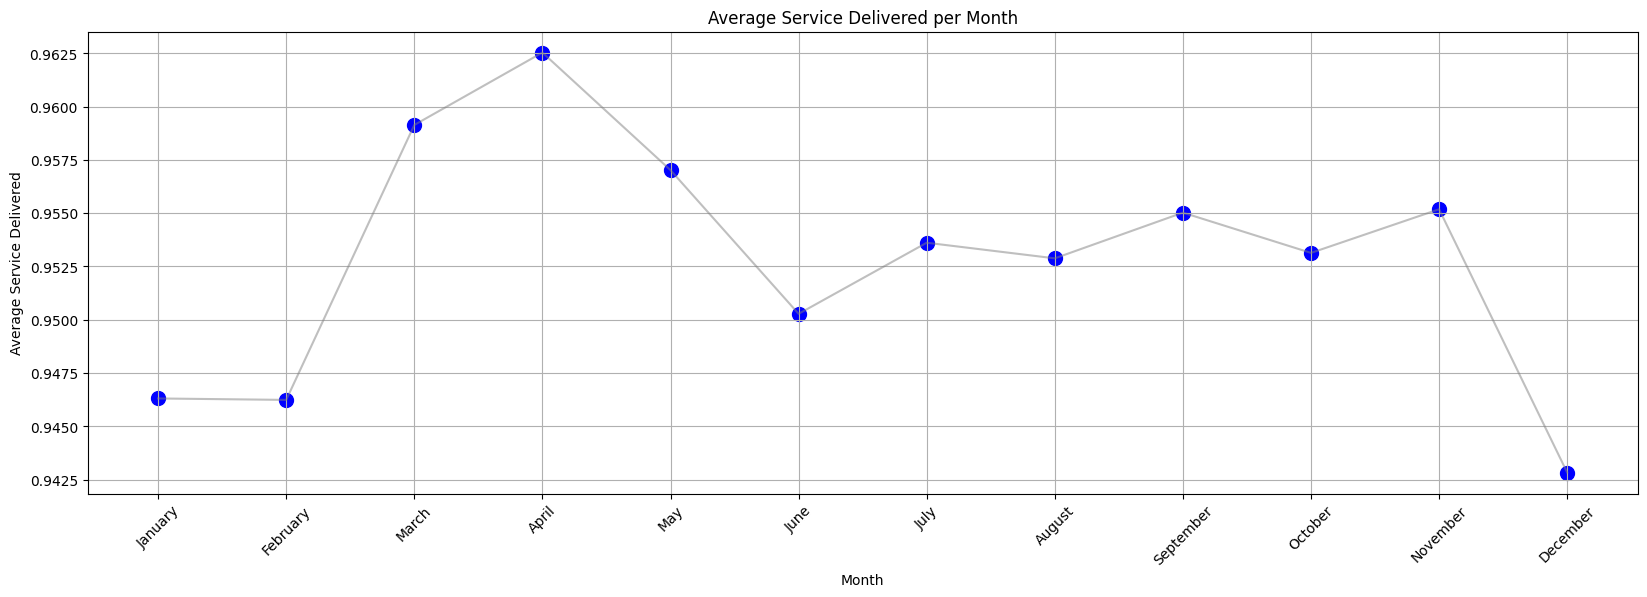

In [21]:
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

cleaned_df['service_delivered'] = pd.to_numeric(cleaned_df['service_delivered'], errors='coerce')

# Grouped by month and calculate the mean
monthly_avg = cleaned_df.groupby('month')['service_delivered'].mean().reset_index()

# Mapping the months
monthly_avg['month'] = monthly_avg['month'].astype(int)
monthly_avg.sort_values('month')
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: month_names[x - 1]) 


# Plot info
plt.figure(figsize=(20,6))
plt.scatter(monthly_avg['month_name'], monthly_avg['service_delivered'], color='blue', s=100)
plt.plot(monthly_avg['month_name'], monthly_avg['service_delivered'], color='gray', linestyle='-', alpha=0.5)
plt.title('Average Service Delivered per Month')
plt.xlabel('Month')
plt.ylabel('Average Service Delivered')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


This dot plot represents

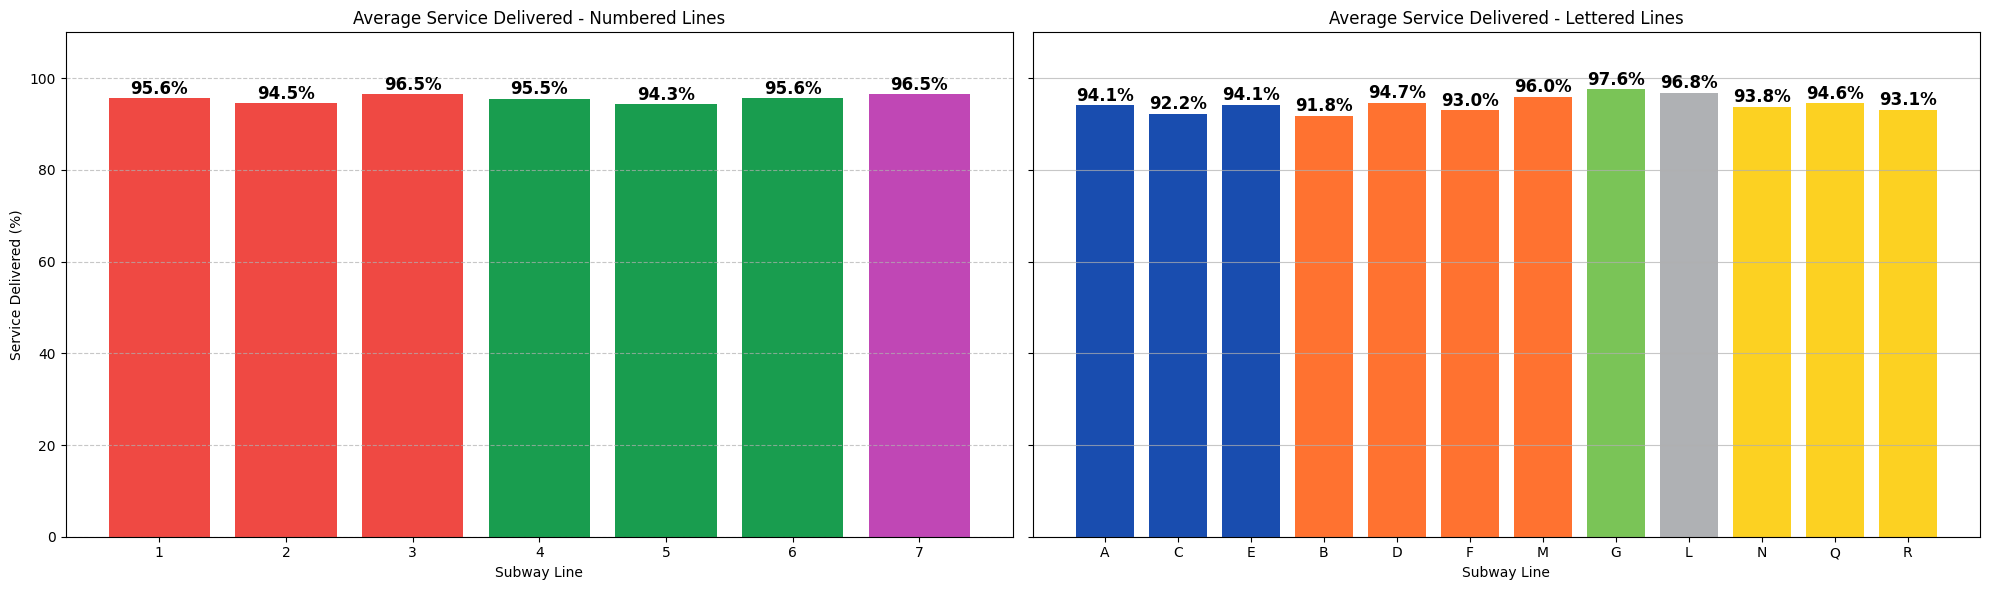

In [23]:
import matplotlib.pyplot as plt

# Official colors for each train line
subway_colors = {
    "1": "#EE352E", "2": "#EE352E", "3": "#EE352E",
    "4": "#00933C", "5": "#00933C", "6": "#00933C",
    "7": "#B933AD",
    "A": "#0039A6", "C": "#0039A6", "E": "#0039A6",
    "B": "#FF6319", "D": "#FF6319", "F": "#FF6319", "M": "#FF6319",
    "G": "#6CBE45",
    "J": "#996633", "Z": "#996633",
    "L": "#A7A9AC",
    "N": "#FCCC0A", "Q": "#FCCC0A", "R": "#FCCC0A",
    "S": "#808183"
}
numbered_lines_order = ["1", "2", "3", "4", "5", "6", "7"]
lettered_lines_order = ["A", "C", "E", "B", "D", "F", "M", "G", "J", "Z", "L", "N", "Q", "R", "S"]

# Group by the 'line' and calculate the mean of each line
line_avg = cleaned_df.groupby('line')['service_delivered'].mean().reset_index()

# Convert from decimal to percentage
line_avg['percentage'] = line_avg['service_delivered'] * 100

# Separate numbered and lettered lines and we do not care about the shuttles 
numbered_lines = line_avg[line_avg['line'].isin(numbered_lines_order)].copy()
lettered_lines = line_avg[line_avg['line'].isin(lettered_lines_order)].copy()

# Ensure sorting is in the correct order
numbered_lines['sort_key'] = numbered_lines['line'].apply(lambda x: numbered_lines_order.index(x))
lettered_lines['sort_key'] = lettered_lines['line'].apply(lambda x: lettered_lines_order.index(x))

numbered_lines.sort_values('sort_key', inplace=True)
lettered_lines.sort_values('sort_key', inplace=True)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)
# Numbered Lines Bar Chart
colors_numbered = [subway_colors[line] for line in numbered_lines['line']]
bars_numbered = axes[0].bar(numbered_lines['line'], numbered_lines['percentage'], color=colors_numbered, alpha=0.9)
axes[0].set_title('Average Service Delivered - Numbered Lines')
axes[0].set_xlabel('Subway Line')
axes[0].set_ylabel('Service Delivered (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for bar, percentage in zip(bars_numbered, numbered_lines['percentage']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Lettered Lines Bar Chart
colors_lettered = [subway_colors[line] for line in lettered_lines['line']]
bars_lettered = axes[1].bar(lettered_lines['line'], lettered_lines['percentage'], color=colors_lettered, alpha=0.9)
axes[1].set_title('Average Service Delivered - Lettered Lines')
axes[1].set_xlabel('Subway Line')
axes[1].grid(axis='y', alpha=0.7)
for bar, percentage in zip(bars_lettered, lettered_lines['percentage']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f"{percentage:.1f}%", ha='center', fontsize=12, fontweight='bold')

# Shared y-axis
axes[0].set_ylim(0, 110)
axes[1].set_ylim(0, 110)

plt.tight_layout()
plt.show()



We separated the two different divisions (Lined vs. Lettered) into two separate bar graphs. This way we can see